# NYC Measles Cases by Age (2018 - 2019)

* This Jupyter/Python notebook creates a bar chart of the 2018-2019 NYC Measles Cases by Age.
* This notebook is part of the [Visualizing the 2019 Measles Outbreak](https://carlos-afonso.github.io/measles/) GitHub project, under [MIT License](https://github.com/carlos-afonso/measles/blob/master/LICENSE).
* [Carlos Afonso](https://www.linkedin.com/in/carlos-afonso-w/), November 1, 2019.

## Import Libraries

In [1]:
# Import the necessary libraries/modules
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd

## Import Data

The data has been manually collected/updated from the source ([NYC Health Measles webpage](https://www1.nyc.gov/site/doh/health/health-topics/measles.page)) and saved as a [CSV file](https://github.com/carlos-afonso/measles/blob/master/data/nyc-health/final/nyc-measles-cases-by-age.csv). We use this manual approach because the data is small and updated infrequently (usually once a week).

In [2]:
# Set (relative) path to the CSV data file
data_file = '../data/nyc-health/final/nyc-measles-cases-by-age.csv'

# Import data from the CSV file as a pandas dataframe
df = pd.read_csv(data_file)

## Check Data

In [3]:
# Show the data
df

,Start Date,End Date,Under 1 year,1 to 4 years,5 to 17 years,18 years and over,Total
0,2018-09-01,2019-08-19,102,277,146,124,649


## Extract Data

Extract and transform the data necessary to create the bar chart.

Each row in the dataframe is a data update. We want the latest data which is the last row in the dataframe.

We want to show the start and end dates in the plot, to provide context. So, let's extract these two dates from the dataframe (last row, first two columns) and transform them into nicelly formatted strings.

In [4]:
# Notes about the lambda function below:
# - 1. The strptime operation transforms the raw date string to a datetime object;
# - 2. The strftime operation transforms the datetime object to a nicelly formatted date string;
# - 3. The replace operation removes any leading zeros.
[start_date, end_date] = map(
    lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%b %d, %Y').replace(' 0', ' '),
    df.iloc[0, :2]
)

# Show the nicelly formated date strings
[start_date, end_date]

['Sep 1, 2018', 'Aug 19, 2019']

We also want to show the total number of cases in the plot, to provide context.

In [5]:
# Get the number of total cases (last row, last column)
total_cases = df.iloc[0, -1]

# Check if there is a problem with the data where the reported total
# does not match the sum of the number of cases for each age group
if total_cases != df.iloc[0, 2:-1].sum():
    print('WARNING: cases for each age group do NOT add up to the reported total!')

total_cases

649

Finally, lets extract the data to actually plot (last row, third to penultimate columns).

In [6]:
# Extract the data to plot (last row, third to penultimate columns)
# Call it 'd2p' as an abbrevation for 'data to plot'
d2p = df.iloc[-1, 2:-1]
d2p

Under 1 year         102
1 to 4 years         277
5 to 17 years        146
18 years and over    124
Name: 0, dtype: object

## Create Bar Chart

We want the bar chart of the NYC Measles Cases by Age to be clear and to contain the necessary context.

To contextualize the bar chart we:
* use a title that explictly says what the bar chart represents;
* use a sub-title that showns the start and end dates, and the total number of cases during that period;
* add a text annotation at the bottom that provides information about the data and image sources.

To make the bar chart as clear as possible we:
* use an horizontal bar chart because it is  easier to read than a vertical one;
* explicitly show the number and percentage of cases for each age group;
* use a large enough font to make all labels easy to read;
* remove unnecessary elements (x-axis ticks and values, y-axis ticks, and plot box).

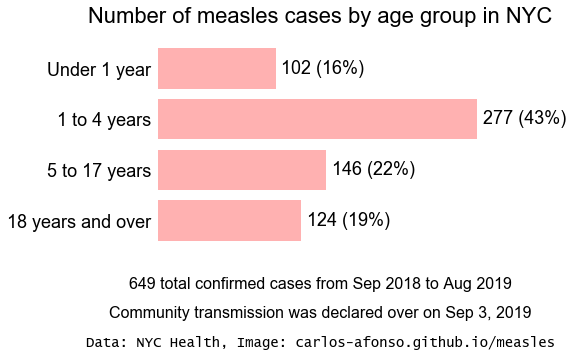

In [7]:
# Define font parameters
fn = 'Arial' # font name
fsb = 18     # font size base

# Create figure
fig = plt.figure()

# Add "figure title"
fig.suptitle('Number of measles cases by age group in NYC', fontname=fn, fontsize=(fsb + 4))
#plt.title('NYC Measles Cases by Age', fontname=fn, fontsize=(fsb + 6))

# Add space between the "figure title" and the plot to create space for the "plot title".
# If we don't add this space the "figure title" and the "plot title" will overlap. 
#fig.subplots_adjust(top = 0.75)

# Add "plot title" which we will be using as the "figure sub-title"
#subtitle = str(total_cases) + ' total cases from ' + start_date + ', to ' + end_date + '\n'
#plt.title(subtitle, fontname=fn, fontsize=(fsb + 2))

# Create the horizontal bar chart
ax = d2p.plot.barh(alpha=0.3, color='red', width=0.8)

# Invert the y-axis
ax.invert_yaxis()

# Remove the x-axis ticks and values
ax.get_xaxis().set_ticks([])

# Remove the y-axis ticks only (keep the labels)
ax.yaxis.set_ticks_position('none')

# Set the y-axis labels font properties
ax.set_yticklabels(d2p.keys(), fontname=fn, fontsize=fsb)

# Create labels in front of the bars showing the number and percentage of cases.
# Note: we round the percentages to the nearest integer.
for i in ax.patches:
    label = str(i.get_width()) + " (" + str(int(round(100 * i.get_width() / total_cases))) + "%)"
    ax.text(i.get_width() + 5, i.get_y() + 0.5, label, fontname=fn, fontsize=fsb)

# Remove the axes box
plt.box(False)

# Add text
text = str(total_cases) + ' total confirmed cases from Sep 2018 to Aug 2019'
fig.text(0.5, 0.0, text, fontname = fn, fontsize = (fsb - 2), horizontalalignment='center')

text = 'Community transmission was declared over on Sep 3, 2019'
fig.text(0.5, -0.1, text, fontname = fn, fontsize = (fsb - 2), horizontalalignment='center')

# Add text about the Data and Image sources
sources = 'Data: NYC Health, Image: carlos-afonso.github.io/measles'
fig.text(0.5, -0.2, sources, fontname='Lucida Console', fontsize=(fsb - 4), horizontalalignment='center')

# Show figure
plt.show()

## Save Bar Chart

In [8]:
# Set image file path/name (without file extension)
img_file = '../images/nyc-measles-cases-by-age-bar-chart-py'

# Save as PNG image
fig.savefig(img_file + '.png', bbox_inches='tight', dpi=200)

# Save as SVG image
fig.savefig(img_file + '.svg', bbox_inches='tight')

## Export Notebook as HTML

In [9]:
# Export this notebook as a static HTML page
os.system('jupyter nbconvert --to html nyc-measles-cases-by-age-final.ipynb')

0